In [1]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In [33]:
ROUND_MAPPING = {
    'pushup': 8,
    'squat': 6,
    'jumping-jack': 4,
    'leg-raise': 3,
    'half-burpee': 3,
}

In [52]:
EXERCISE = 'pushup'
DS_TYPE = 'keypoints_seq'
SEQ_LEN = 'single'
ROUND = ROUND_MAPPING[EXERCISE]
MODEL_TYPE = 'kps_seq'
BENCHMARK = True
if BENCHMARK:
    ROUND = 'BM_BARE'
# just for selecting only base classes
CUR_CLASS = 'down'
PREV_CLASS = 'up'
BASE_CLASSES = [f'{EXERCISE}-{CUR_CLASS}',f'{EXERCISE}-{PREV_CLASS}']

In [53]:
res_base_dir = f'/data1-6tb/jom/Dataset/EzFit_dataset/outputs/test/{DS_TYPE}/len_{SEQ_LEN}'
if BENCHMARK:
    res_file = os.path.join(res_base_dir, f'{MODEL_TYPE}_{EXERCISE}_{ROUND}.csv')
else:
    res_file = os.path.join(res_base_dir, f'{MODEL_TYPE}_{EXERCISE}.csv')

In [54]:
res_df = pd.read_csv(res_file)
if EXERCISE == 'pushup':
    res_df['class'] = res_df['class'].replace({'pushup_up':'pushup-up'})
if EXERCISE == 'jumping-jack':
    res_df['5-classes-view'] = res_df['5-classes-view'].str.strip()
res_df

,path,class,3-classes-view,5-classes-view,position,distance,predicted
0,keypoints_seq/len_8/squat/idle/squat_1_1/squat...,idle,side,side,center,fit,squat-up
1,keypoints_seq/len_8/squat/idle/squat_1_1/squat...,idle,side,side,center,fit,squat-up
2,keypoints_seq/len_8/squat/idle/squat_1_1/squat...,idle,side,side,center,fit,squat-up
3,keypoints_seq/len_8/squat/idle/squat_1_1/squat...,idle,side,side,center,fit,squat-up
4,keypoints_seq/len_8/squat/idle/squat_1_1/squat...,idle,side,side,center,fit,squat-down
...,...,...,...,...,...,...,...
3787,keypoints_seq/len_8/squat/squat-up/squat_3_8/s...,squat-up,side,side,center,fit,squat-up
3788,keypoints_seq/len_8/squat/squat-up/squat_3_8/s...,squat-up,side,side,center,fit,squat-up
3789,keypoints_seq/len_8/squat/squat-up/squat_3_8/s...,squat-up,side,side,center,fit,squat-up
3790,keypoints_seq/len_8/squat/squat-up/squat_3_8/s...,squat-up,side,side,center,fit,squat-up


In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [56]:
# accuracy
accuracy_score(res_df['class'], res_df['predicted'])

0.47837552742616035

In [57]:
# OK to add both 
# add result trained with only 2 base classes
only_base = res_df[res_df['class'].isin(BASE_CLASSES)]
# accuracy only base
print(f"Amount: {len(only_base)} | Acc: {accuracy_score(only_base['class'], only_base['predicted'])}")

Amount: 2007 | Acc: 0.9038365719980069


In [9]:
with open(f'/data1-6tb/jom/EzFit_models/saved_pickles/len_{SEQ_LEN}/round_{ROUND}/{EXERCISE}/{EXERCISE}_kps_seq_le.pickle', 'rb') as file:
    loaded_le = pickle.load(file)

In [25]:
cm = confusion_matrix(res_df['class'], res_df['predicted'])
if BENCHMARK:
    cm = confusion_matrix(only_base['class'], only_base['predicted'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=loaded_le.classes_)

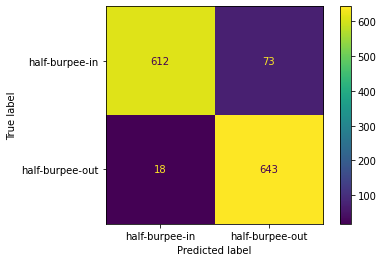

In [26]:
disp.plot()
plt.show()

In [121]:
for view in res_df['5-classes-view'].unique():
    temp = res_df[res_df['5-classes-view']==view]
    print(f'===View: {view}===')
    print(f'amount: {len(temp)} | percentage: {len(temp)/len(res_df)}')
    print(f"acc: {accuracy_score(temp['class'], temp['predicted'])}")
    print()

===View: side===
amount: 1977 | percentage: 0.7311390532544378
acc: 0.7486090035407182

===View: right-tilted===
amount: 279 | percentage: 0.10318047337278106
acc: 0.7598566308243727

===View: back===
amount: 144 | percentage: 0.05325443786982249
acc: 0.4375

===View: left-tilted===
amount: 304 | percentage: 0.11242603550295859
acc: 0.756578947368421



In [122]:
# instead of right and left -> change to non-center
# cuz we want to recommend center

# for view in res_df['position'].unique():
temp = res_df[res_df['position']=='center']
print(f'===Position: center===')
print(f'amount: {len(temp)} | percentage: {len(temp)/len(res_df)}')
print(f"acc: {accuracy_score(temp['class'], temp['predicted'])}")
print()

===Position: center===
amount: 1992 | percentage: 0.7366863905325444
acc: 0.7404618473895582



In [123]:
# for view in res_df['position'].unique():
temp = res_df[res_df['position']!='center']
print(f'===Position: Non-center===')
print(f'amount: {len(temp)} | percentage: {len(temp)/len(res_df)}')
print(f"acc: {accuracy_score(temp['class'], temp['predicted'])}")
print()

===Position: Non-center===
amount: 712 | percentage: 0.26331360946745563
acc: 0.7162921348314607



In [124]:
# write in the sense that far is not good, fit and close OK
for dist in res_df['distance'].unique():
    temp = res_df[res_df['distance']==dist]
    print(f'===Position: {dist}===')
    print(f'amount: {len(temp)} | percentage: {len(temp)/len(res_df)}')
    print(f"acc: {accuracy_score(temp['class'], temp['predicted'])}")
    print()

===Position: fit===
amount: 1856 | percentage: 0.6863905325443787
acc: 0.8550646551724138

===Position: far===
amount: 848 | percentage: 0.3136094674556213
acc: 0.4693396226415094

